In [22]:
import json
import os
import matplotlib.pyplot as plt


In [90]:
teams_dict = {}
with open("../Data/teams.json") as f:
        teams = json.load(f)
        for team in teams:
            if team['type'] == 'club':
                teams_dict[team['wyId']] = team['name']


In [95]:
teams_dict[1619]

'Southampton'

In [3]:
players_pos_dict = {}
with open("../Data/players.json") as f:
    players = json.load(f)
    for p in players:
        players_pos_dict[p['wyId']] = p['role']['code2']



In [4]:
matchesDict = {}
playerOrder = ['GK', 'DF', 'MD', 'FW']
order = {key: i for i, key in enumerate(playerOrder)}

with open("../Data/matches_England.json") as f:
    matches = json.load(f)
    for m in matches:
        teams = list(m['teamsData'].keys())
        matchesDict[m['wyId']] = []
        matchesDict[m['wyId']].append(list(m['teamsData'].keys()))
        temp_dict = {}
        for team in teams:
            temp_dict[team] = {}
            for player in m['teamsData'][team]['formation']['lineup']:
                temp_dict[team][player['playerId']] = players_pos_dict[player['playerId']]
            temp_dict[team] = dict(sorted(temp_dict[team].items(), key=lambda item: order[item[1]]))
            ind = 0
            for t in temp_dict[team]:
                temp_dict[team][t] = [temp_dict[team][t], ind]
                ind += 1
            for subs in m['teamsData'][team]['formation']['substitutions']:
                try:
                    temp_dict[team][subs['playerIn']] =  temp_dict[team][subs['playerOut']]
                except:
                    continue
        matchesDict[m['wyId']].append(temp_dict)


In [5]:
regionsDict = {}

regionsDict[1] = [16.5, 1800/61]
regionsDict[2] = [16.5, 4300/61]
regionsDict[3] = [16.5, 100]
regionsDict[4] = [33.25, 1800/61]
regionsDict[5] = [33.25, 4300/61]
regionsDict[6] = [33.25, 100]
regionsDict[7] = [50, 1800/61]
regionsDict[8] = [50, 4300/61]
regionsDict[9] = [50, 100]
regionsDict[10] = [66.75, 1800/61]
regionsDict[11] = [66.75, 4300/61]
regionsDict[12] = [66.75, 100]
regionsDict[13] = [83.5, 1800/61]
regionsDict[14] = [83.5, 4300/61]
regionsDict[15] = [83.5, 100]
regionsDict[16] = [100, 1800/61]
regionsDict[17] = [100, 4300/61]
regionsDict[18] = [100, 100]


In [6]:
goals = {}
e = 0
with open("../Data/events_England.json") as f:
    events = json.load(f)
    while e < len(events):
        if {'id': 101} in events[e]['tags'] and events[e]['subEventId'] in [100, 91]:
            team = events[e]['teamId']
            if team not in goals:
                goals[team] = []
            tempDict = {}
            tempDict['matchId'] = events[e]['matchId']
            tempDict['teamId'] = team
            tempDict['teamName'] = teams_dict[team]
            tempDict['playerId'] = events[e]['playerId']
            tempDict['position'] = events[e]['positions'][0]
            for r in range(1, 19):
                if (tempDict['position']['x'] <= regionsDict[r][0]) & (tempDict['position']['y'] <= regionsDict[r][1]):
                    tempDict['region'] = r
                    break
            tempDict['playingPos'] = players_pos_dict[events[e]['playerId']]
            if events[e]['teamId'] == int(matchesDict[events[e]['matchId']][0][0]):
                tempDict['opponentId'] = matchesDict[events[e]['matchId']][0][1]
            else:
                tempDict['opponentId'] = matchesDict[events[e]['matchId']][0][0]
            tempDict['oppenentName'] = teams_dict[int(tempDict['opponentId'])]
            tempDict['playerIndex'] = matchesDict[events[e]['matchId']][1][str(team)][events[e]['playerId']][1]
            tempDict['id'] = events[e]['id']
            p_index = e-1
            evnt = events[p_index]['eventName']
            passes = []
            tm = events[p_index]['teamId']
            while (evnt == "Pass") & (tm == team):
                pass_dict = {}
                pass_dict['position'] = events[p_index]['positions'][0]
                for r in range(1, 19):
                    if (pass_dict['position']['x'] <= regionsDict[r][0]) & (pass_dict['position']['y'] <= regionsDict[r][1]):
                        pass_dict['region'] = r
                        break
                pass_dict['playerId'] = events[p_index]['playerId']
                pass_dict['playingPos'] = players_pos_dict[events[p_index]['playerId']]
                pass_dict['playerIndex'] = matchesDict[events[e]['matchId']][1][str(team)][pass_dict['playerId']][1]
                p_index -= 1
                evnt = events[p_index]['eventName']
                tm = events[p_index]['teamId']
                passes.append(pass_dict)
            tempDict['passes'] = passes
            goals[team].append(tempDict)
            e += 1
        e += 1
                

In [7]:
goals_per_team = {}
for k, v in goals.items():
    passes = 0
    for goal in v:
        passes += len(goal['passes'])
    goals_per_team[k] = [len(v), passes/len(v)]

In [8]:
total_goals = 0
for team in goals:
    total_goals += len(goals[team])

In [9]:
total_goals

932

In [10]:
for k, v in goals.items():
    v = [x for x in v if len(x['passes']) > 1]
    len_network = 0
    for g in v:
        len_network += len(g['passes'])
    goals[k] = v

In [11]:
total_goals = 0
for team in goals:
    total_goals += len(goals[team])

In [12]:
total_goals

218

In [13]:
goals_per_team_filtered = {}
for k, v in goals.items():
    passes = 0
    for goal in v:
        passes += len(goal['passes'])
    goals_per_team_filtered[k] = [len(v), passes/len(v)]

In [297]:
with open('../Data/goals.json', 'w') as f:
    json.dump(goals, f)

In [295]:
goals_per_team_filtered

{1609: [22, 5.818181818181818],
 1631: [11, 2.8181818181818183],
 1625: [39, 4.256410256410256],
 1646: [8, 3.75],
 1610: [9, 4.888888888888889],
 1673: [8, 3.25],
 1623: [8, 2.75],
 1611: [15, 4.266666666666667],
 1624: [16, 3.625],
 1644: [5, 5.6],
 1612: [20, 4.2],
 1627: [4, 3.75],
 1639: [6, 4.166666666666667],
 1633: [7, 3.142857142857143],
 1659: [10, 4.5],
 10531: [2, 3.5],
 1613: [7, 3.7142857142857144],
 1651: [6, 4.166666666666667],
 1619: [7, 2.7142857142857144],
 1628: [8, 4.5]}

In [19]:
x = []
y = []
r = []

for k,v in goals.items():
    for g in goals[k]:
        x.append(g['position']['x'])
        y.append(g['position']['y'])
        r.append(g['region'])
        for p in g['passes']:
            x.append(p['position']['x'])
            y.append(p['position']['y'])
            r.append(p['region'])

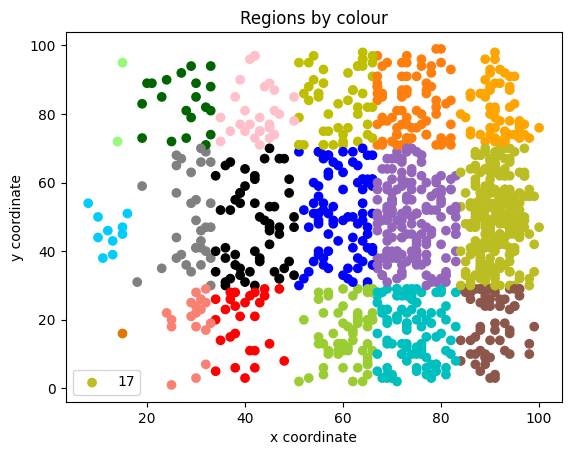

In [61]:
from matplotlib.colors import ListedColormap

colors = ['xkcd:pumpkin', "xkcd:bright sky blue", 'xkcd:light green', 
          'salmon', 'grey', 'darkgreen', 'red', 'black', 'pink', 'yellow'
        'green', 'b', 'y', 'c', 'tab:purple', 'tab:orange', 'tab:brown', 'tab:olive', 'orange']
cmap = ListedColormap(colors)
plt.scatter(x, y, c=r, cmap=cmap)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Regions by colour')
plt.legend(r)
plt.show()

AttributeError: 'Axes' object has no attribute 'tight_layout'

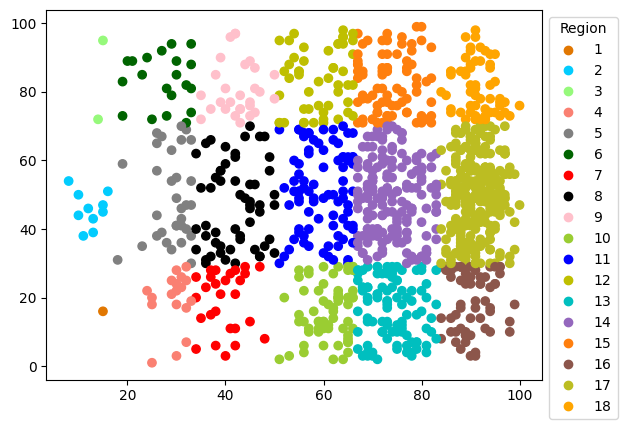

In [89]:
fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(x, y, c=r, cmap=cmap)


# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=18),
                    title="Region", bbox_to_anchor=(1, 1.0), loc='upper left')

ax.tight_layout()
ax.add_artist(legend1)